Para poder escribir la ecuación en LaTeX podemos usar el comando `latex(f)`.

## Ejercicio 2

Considera el subconjunto $C$ de $\mathbb{R}^2$ dado por $f(x,y)=0$ donde 
$$
f(x,y)=27 \, x^{3} + 108 \, x^{2} y + 144 \, x y^{2} + 64 \, y^{3} - 1620 \, x^{2} + 4680 \, x y - 255 \, y^{2} + 6975 \, x - 1950 \, y - 15625.
$$

1.  Encuentra el único punto $P\in C$ donde se anulen las dos derivadas parciales de $f$.
1.  Usando las rectas que pasan por $P$ intenta dar una parametrización de $C$.
1.  Si no lo consigues (algún denominador inoportuno), haz un cambio de variable para evitarlo y conseguir una parametrización regular
$\bfx:\RR\to\RR^2$ cuya imagen esté en $C$.
1.  ¿Echas en falta algún punto de $C$ en la imagen de la parametrización?
1.  Calcula la curvatura y encuentra los vértices. Escoge el que tiene parámetro *intermedio* al que llamaremos $Q$.
1.  Reparametriza para que $\bfx(0)=Q$ y $\norma{\bfx'(0)}=1$.
1.  Recalcula la curvatura $\kappa$, compara $\kappa(t)$ y $\kappa(-t)$ e interpreta la comparación geométricamente.
1.  Calcula la evoluta y dibújala con la curva.


Vamos a empezar definiendo las primeras funciones y gráficas.

In [1]:
reset()
var('x y')
f(x,y)=27*x^3 + 108*x^2*y + 144*x*y^2 + 64*y^3 - 1620*x^2 + 4680*x*y - 255*y^2 + 6975*x - 1950*y - 15625
f(x,y).show()

27*x^3 + 108*x^2*y + 144*x*y^2 + 64*y^3 - 1620*x^2 + 4680*x*y - 255*y^2 + 6975*x - 1950*y - 15625

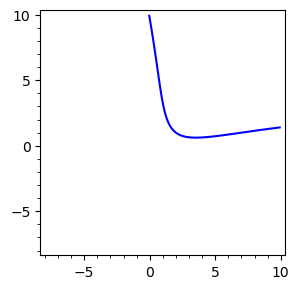

In [7]:
I = implicit_plot(f(x,y)==0,(x,-8,10),(y,-8,10), color='blue')
I.show(figsize=4)

$\textbf{1 -}$ Encuentra el único punto $P\in C$ donde se anulen las dos derivadas parciales de $f$.

In [8]:
df_dx = diff(f, x)  
df_dy = diff(f, y)  

puntosCriticos = solve([df_dx == 0, df_dy == 0], x, y)
puntosCriticos

[[x == (-17/5), y == (-31/5)], [x == (1/5), y == (-7/5)]]

Encontramos dos puntos críticos $P1,P2$, que son
$$P_1=\left(-\frac{17}{5},-\frac{31}{5}\right)~~~,~~~~ P_2=\left(\frac{1}{5},-\frac{7}{5}\right)$$


Solamente uno de los puntos críticos que hemos obtenido debería pertenecer a $C$. Veamos cuál:

In [9]:
f(x=-17/5, y=-31/5)

0

El punto $(-17/5, -31/5)$ pertenece.

In [10]:
f(x=1/5, y= -7/5)

-13500

El punto $(1/5, -7/5)$ no pertenece.

Por lo tanto, el punto $P $ que estamos buscando es $(-17/5, -31/5)$

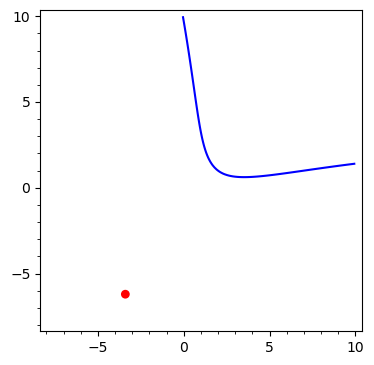

In [11]:
P = point((-17/5,-31/5), color='red', size=40)
(I + P).show(figsize=5)

$\textbf{2 -}$ Usando las rectas que pasan por $P$ intenta dar una parametrización de $C$.

Vamos a intentar parametrizar $C$ usando las rectas que pasan por $P$. Las rectas que pasan por $P=(a,b)$ son de la forma
$$(x,y)=(a,b)+t (u,v),$$
donde $(u,v)$ es el vector director.

En coordenadas cartesianas tenemos que
$$\left\{
x(t)=a+tu\atop
y(t)=b+tv
\right.$$

In [12]:
var('u v t')

a, b = -17/5, -31/5

x_t = a + t*u
y_t = b + t*v

parametrizacion = f.subs({x: x_t, y: y_t})
sols = solve(parametrizacion, t)

show(sols)

[t == 45*(57*u^2 - 48*u*v + 43*v^2)/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3), t == 0]

La solución $t=0$ nos da el propio punto, una solución trivial y que no nos vale. Así que tomamos el otro posible valor de $t$.

In [16]:
t(u,v) = 45*(57*u^2 - 48*u*v + 43*v^2)/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3)
t.show()

(u, v) |--> 45*(57*u^2 - 48*u*v + 43*v^2)/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3)

In [17]:
x_u = a + t(u,v) * u
y_u = b + t(u,v) * v

x_u.show()
y_u.show()

45*(57*u^2 - 48*u*v + 43*v^2)*u/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 17/5

45*(57*u^2 - 48*u*v + 43*v^2)*v/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 31/5

In [18]:
(x_u, y_u)

(45*(57*u^2 - 48*u*v + 43*v^2)*u/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 17/5,
 45*(57*u^2 - 48*u*v + 43*v^2)*v/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 31/5)

Vamos a ver si esta parametrización presenta problemas en el denominador.

In [19]:
denominador = 27*u**3 + 108*u**2*v + 144*u*v**2 + 64*v**3
sol_u = solve(denominador, u)
sol_v = solve(denominador, v)

sol_u, sol_v

([u == -4/3*v], [v == -3/4*u])

En efecto, nos encontramos ante un denominador problemático, tendremos que encontrar una mejor parametrización mediante un cambio de variable.

$\textbf{3 -}$ Si no lo consigues (algún denominador inoportuno), haz un cambio de variable para evitarlo y conseguir una parametrización regular
$\bfx:\RR\to\RR^2$ cuya imagen esté en $C$.

Vamos a emplear el siguiente cambio de variable: $$\left\{ u = \frac{1}{3} - \frac{4}{3}\cdot t \atop v = t
\right.$$

In [20]:
x_u = 45*(57*u^2 - 48*u*v + 43*v^2)*u/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 17/5
y_u = 45*(57*u^2 - 48*u*v + 43*v^2)*v/(27*u^3 + 108*u^2*v + 144*u*v^2 + 64*v^3) - 31/5

t = var('t')

x_wz = x_u.subs({u: (1/3) - (4/3)*t, v: t}).simplify_full()
y_wz = y_u.subs({u: (1/3) - (4/3)*t, v: t}).simplify_full()

show(x_wz), show(y_wz)

-12500*t^3 + 7125*t^2 - 1380*t + 458/5

9375*t^3 - 3000*t^2 + 285*t - 31/5

(None, None)

Hemos evitado el problema del denominador. Veamos la gráfica.

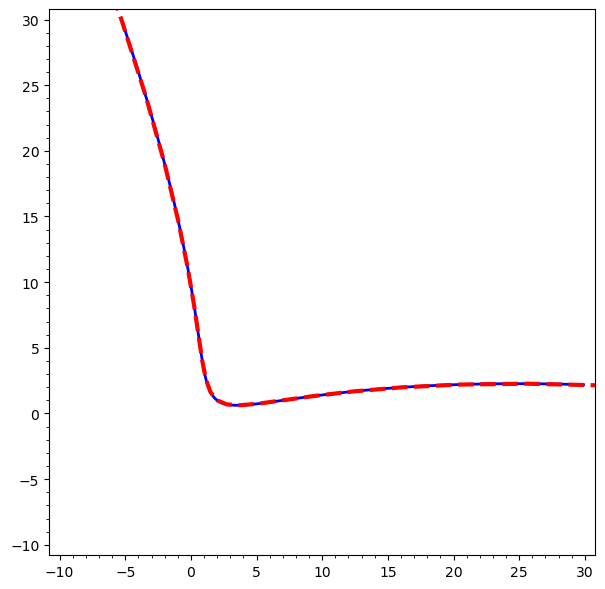

In [22]:
f_plot = implicit_plot(f == 0, (x, -10, 30), (y, -10, 30), color='blue', linewidth=2)

x_t(t) = -12500*t^3 + 7125*t^2 - 1380*t + 458/5
y_t(t) = 9375*t^3 - 3000*t^2 + 285*t - 31/5

#Vamos a graficar en estos puntos (Cuantos más pongamos será más precisa)
theta_values = srange(0, 2, 0.01, include_endpoint=False)
points = [(x_t(t_val).n(), y_t(t_val).n()) for t_val in theta_values]

param_plot = line(points, color='red', thickness=3, linestyle='--') #La ponemos discontinua porque estará una encima de la otra

show(f_plot + param_plot, figsize=8, xmin=-10, xmax=30, ymin=-10, ymax=30)

La parametrización coincide con la curva.

Así que tenemos nuestra parametrización:
$$\begin{align*}
\textbf{x}: \mathbb{R} &\to \mathbb{R}^2 \\
\theta &\mapsto x(t)=(x_1(t),x_2(t))
\end{align*},
$$
siendo
$$x_1(t) = \frac{1}{3} - \frac{4}{3}\cdot t$$
$$x_2(t) = t$$

In [23]:
V=vector([x_wz,y_wz])
V

(-12500*t^3 + 7125*t^2 - 1380*t + 458/5, 9375*t^3 - 3000*t^2 + 285*t - 31/5)

In [24]:
V1=V.derivative(t)
solve([V1[0]==0,V1[1]==0],t)

[]

Obtenemos que no se anula la derivada en ningún punto $\implies$ tenemos una parametrización válida.

$\textbf{4 -}$¿Echas en falta algún punto de $C$ en la imagen de la parametrización?

Veamos de nuevo todas las gráficas combinadas:

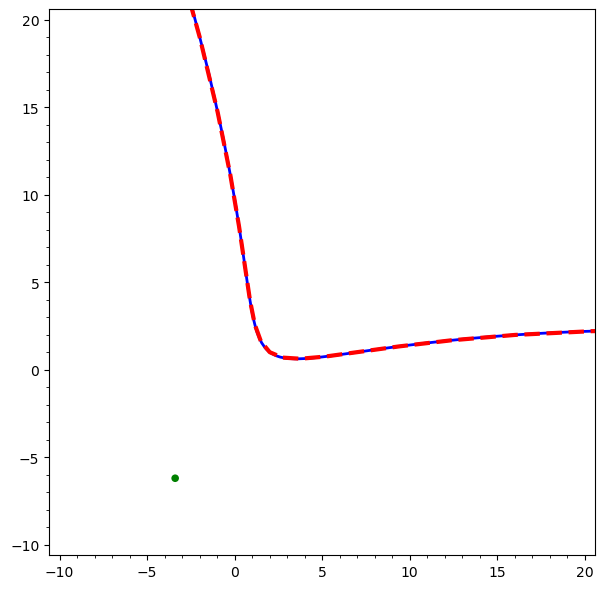

In [25]:
f_plot = implicit_plot(f == 0, (x, -10, 30), (y, -10, 30), color='blue', linewidth=2)

x_t(t) = -12500*t^3 + 7125*t^2 - 1380*t + 458/5
y_t(t) = 9375*t^3 - 3000*t^2 + 285*t - 31/5

P = point((-17/5, -31/5), size=30, color='green', zorder=5)

t_values = srange(0, 2, 0.01, include_endpoint=False)
points = [(x_t(t_val).n(), y_t(t_val).n()) for t_val in t_values]

param_plot = line(points, color='red', thickness=3, linestyle='--')

show(f_plot + param_plot + P, figsize=8, xmin=-10, xmax=20, ymin=-10, ymax=20)

$\implies $El punto $ P = \left(-\frac{17}{5},-\frac{31}{5}\right)$, usado para obtener la parametrización, pertenece al conjunto $C$ del enunciado, pero no pertence a la imagen de la curva obtenida.

$\textbf{5 -}$ Calcula la curvatura y encuentra los vértices. Escoge el que tiene parámetro intermedio al que llamaremos $Q$.

Emplearemos una de las funciones ya predefinidas.

In [26]:
def curvaplana1(W,variable=t):
    s=variable
    W1=W.derivative(t)
    W2=W1.derivative(t)
    reg=(W1*W1).simplify_full().factor()
    ct=W1.normalized().simplify_full()
    a,b=ct
    cn=vector([-b,a])
    kappa=Matrix([W1,W2]).det()/W1.norm()^3
    kappa=kappa.simplify_full().factor()
    return [reg,ct,cn,kappa]

In [27]:
resultados=curvaplana1(V)
curvatura = resultados[3]

In [28]:
show(curvatura)

10/3*(25*t - 3)*(5*t - 1)/(390625*t^4 - 250000*t^3 + 63750*t^2 - 7600*t + 353)^(3/2)

In [29]:
curv_dt = curvatura.derivative(t).simplify_full()

ceros = solve(curv_dt == 0,t)

In [35]:
show(ceros)

[t == -1/25*sqrt(-sqrt(5)) + 4/25, t == 1/25*sqrt(-sqrt(5)) + 4/25, t == -1/25*5^(1/4) + 4/25, t == 1/25*5^(1/4) + 4/25, t == (4/25)]

El de parámetro intermedio será para $t = 4/25$, y obtenemos:

In [30]:
P_intermedio=V.subs(t=4/25)
P_intermedio

(2, 1)

Graficamos la curva y el punto intermedio y vemos que no es ningún resultado absurdo.

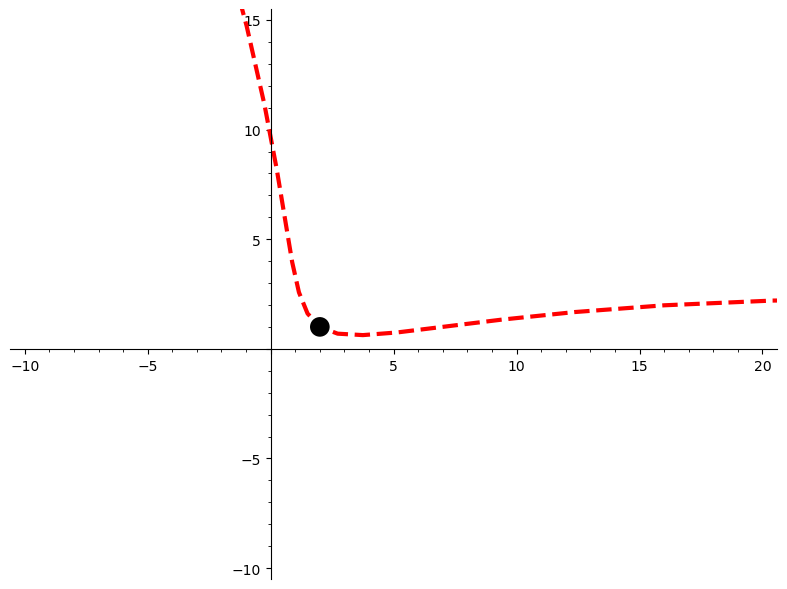

In [31]:
x_t(t) = -12500*t^3 + 7125*t^2 - 1380*t + 458/5
y_t(t) = 9375*t^3 - 3000*t^2 + 285*t - 31/5

P1 = point((2, 1), size=200, color='black', zorder=5)
t_values = srange(0, 2, 0.01, include_endpoint=False)
points = [(x_t(t_val).n(), y_t(t_val).n()) for t_val in t_values]

param_plot = line(points, color='red', thickness=3, linestyle='--')

show(param_plot + P1, figsize=8, xmin=-10, xmax=20, ymin=-10, ymax=15)

$ \textbf{6 -}$ Reparametriza para que $\bfx(0)=Q$ y $\norma{\bfx'(0)}=1$.

Para que la parametrización en $0$ de el punto $Q$ debemos hacer un simple desplazamiento $t = h + 4/25$.

In [32]:
var ('h')
W=vector([V[0].subs(t=h+4/25).simplify_full(), V[1].subs(t=h+4/25).simplify_full()])
show(W)

(-12500*h^3 + 1125*h^2 - 60*h + 2, 9375*h^3 + 1500*h^2 + 45*h + 1)

Por otro lado, nos pide que la norma de la derivada resulte 1. Debemos ajustar la velocidad de la curva multiplicando por una constante k. Vamos a ver cuánto vale actualmente.

In [33]:
W_d=W.derivative(h)
W_h0=W_d.subs(h=0).norm()
W_h0

75

Por tanto, tenemos que ajustar $h = h/75$.

In [34]:
G = W.subs(h=h/75)
G

(-4/135*h^3 + 1/5*h^2 - 4/5*h + 2, 1/45*h^3 + 4/15*h^2 + 3/5*h + 1)

Reescribimos en un vector en función de t los resultados obtenidos y comprobamos que cumple el paso anterior.

In [35]:
V1=vector([-4/135*t^3 + 1/5*t^2 - 4/5*t + 2, 1/45*t^3 + 4/15*t^2 + 3/5*t + 1])
V1

(-4/135*t^3 + 1/5*t^2 - 4/5*t + 2, 1/45*t^3 + 4/15*t^2 + 3/5*t + 1)

In [36]:
V1.subs(t=0)

(2, 1)

In [37]:
V1_d = V1.derivative(t)
V_t0 = V1_d.subs(t=0).norm()
V_t0

1

Cumple todo, por último veamos la gráfica con esta parametrización.

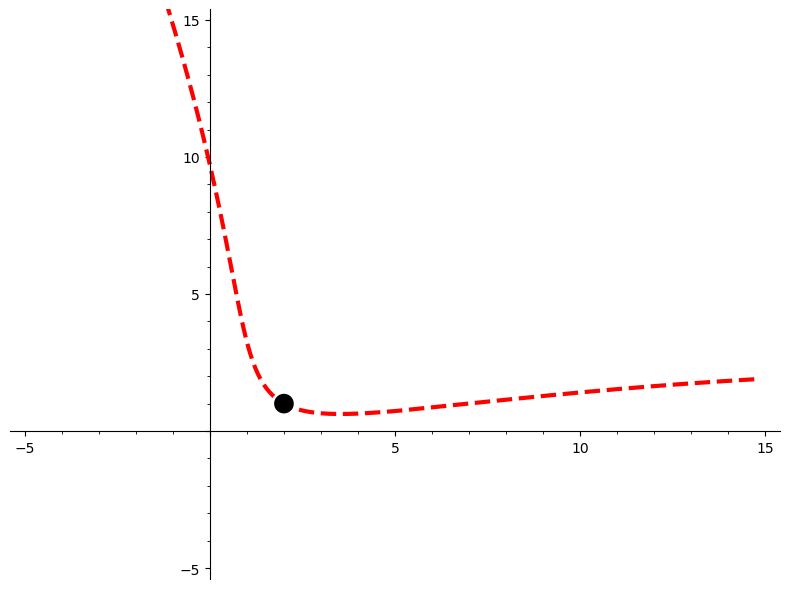

In [41]:
x_t1(t) = -4/135*t^3 + 1/5*t^2 - 4/5*t + 2
y_t2(t) = 1/45*t^3 + 4/15*t^2 + 3/5*t + 1

P1 = point((2, 1), size=200, color='black', zorder=5)
t_values = srange(-5, 15, 0.01, include_endpoint=False)
points = [(x_t1(t_val).n(), y_t2(t_val).n()) for t_val in t_values]

param_plot = line(points, color='red', thickness=3, linestyle='--')

show(param_plot + P1, figsize=8, xmin=-5, xmax=15, ymin=-5, ymax=15)

$ \textbf{7 -}$ Recalcula la curvatura $\kappa$, compara $\kappa(t)$ y $\kappa(-t)$ e interpreta la comparación geométricamente.

Empleamos de nuevo la función predefinida para la curvatura de nuestra parametrización ajustada a lo que se nos pedía.

In [46]:
resultados2=curvaplana1(V1)
curvatura1 = resultados2[3]
show(curvatura1)

54*(t + 3)*(t - 3)/(t^4 + 54*t^2 + 81)^(3/2)

Ahora establecemos el caso $-t$ y vemos su curvatura.

In [47]:
curvatura_neg=resultados2[3].subs(t=-t).simplify_full()
show(curvatura_neg)

54*(t^2 - 9)/(t^4 + 54*t^2 + 81)^(3/2)

Es la misma función $\implies$ es una función par y por lo tanto $\kappa(t)$ = $\kappa(-t)$.

$ \textbf{8 -}$ Calcula la evoluta y dibújala con la curva.

Con los resultados obtenidos previamente, aplicamos la fórmula de la evoluta:

In [48]:
evoluta=(V1+resultados2[2]/curvatura1).simplify_full()
evoluta

(-1/270*(3*t^6 + 32*t^5 + 135*t^4 + 1440*t^3 + 1647*t^2 + 7047)/(t^2 - 9), -1/135*(2*t^6 - 12*t^5 + 90*t^4 - 540*t^3 + 1323*t^2 + 2673)/(t^2 - 9))

In [49]:
show(evoluta)

(-1/270*(3*t^6 + 32*t^5 + 135*t^4 + 1440*t^3 + 1647*t^2 + 7047)/(t^2 - 9), -1/135*(2*t^6 - 12*t^5 + 90*t^4 - 540*t^3 + 1323*t^2 + 2673)/(t^2 - 9))

Graficaremos esta expresión, teniendo en cuenta los polos en $t=3$, $t=-3$.

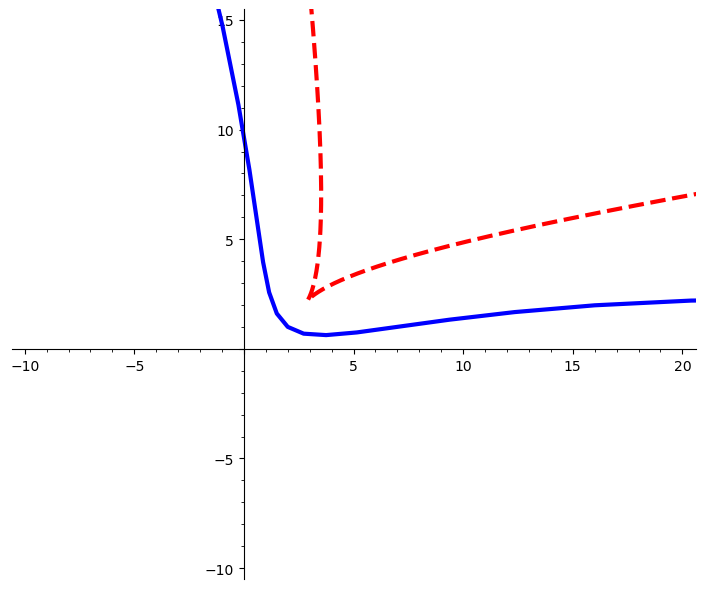

In [50]:
#Parametrizacion
x_t1(t) = -4/135*t^3 + 1/5*t^2 - 4/5*t + 2
y_t2(t) = 1/45*t^3 + 4/15*t^2 + 3/5*t + 1

P1 = point((2, 1), size=200, color='black', zorder=5)
t_values = srange(0, 2, 0.01, include_endpoint=False)
points = [(x_t(t_val).n(), y_t(t_val).n()) for t_val in t_values]

param_plot2 = line(points, color='blue', thickness=3, linestyle='-')


#Evoluta
x_evoluta(t) = -1/270*(3*t^6 + 32*t^5 + 135*t^4 + 1440*t^3 + 1647*t^2 + 7047)/(t^2 - 9)
y_evoluta(t) = -1/135*(2*t^6 - 12*t^5 + 90*t^4 - 540*t**3 + 1323*t^2 + 2673)/(t^2 - 9)

# Rangos de t para evitar los polos en t = 3 // t = -3
t_ranges = [(-8, -3.1), (-2.9, 2.9), (3.1, 8)]

# Graficamos por separado y sumamos
param_plot = sum(parametric_plot((x_evoluta(t), y_evoluta(t)), (t, tr[0], tr[1]), color='red', thickness=3, linestyle='--') for tr in t_ranges)


show(param_plot +param_plot2, figsize=8, xmin=-10, xmax=20, ymin=-10, ymax=15)


$\textbf{Teorema fundamental de curvas planas}$ Sea $\kappa: [a,b]\to \mathbb{R}$ función diferenciable. Entonces,
$$\exists ! \textbf{x}:[a,b]\to\mathbb{R} \text{ curva plana parametrizada por el arco t.q } \textbf{x}(a)=(0,0), \textbf{x}'(a)=(1,0) \text{ y su curvatura es } \kappa$$

Sea $\kappa_1=t$. Por el Teorema fundamental de curvas planas, sabemos que existe una única curva plana $\textbf{x}_1:\mathbb{R}\to\mathbb{R}$ parametrizada por el arco tal que su curvatura es $\kappa_1=t$.

Dado que $\kappa_1(s)=\frac{d\theta}{ds}$, vamos a obtener $\theta(s)$
$$\kappa_1(s)=\frac{d\theta}{ds} ~~~ \Longleftrightarrow ~~~ d\theta=\kappa_1(s)ds ~~~\Longleftrightarrow ~~~ \theta(s)=\int \kappa_1(s)ds$$

Puesto que $\kappa_1(t)=t$ e integrando, obtenemos
$$\theta(t)=\int \kappa_1(t)dt=\int tdt$$